In [210]:
import numpy as np
import pandas as pd


In [212]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [214]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
976,ham,Ok i shall talk to him,NaN,NaN,NaN
635,ham,Me n him so funny...,NaN,NaN,NaN
4867,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
1277,ham,Dont put your phone on silent mode ok,NaN,NaN,NaN
5026,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN


In [216]:
df.shape

(5572, 5)

In [218]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [220]:
#1. data cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Evaluation
#6. Improvement
#7. Website
#8. Deploy

## 1. DATA CLEANING

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [225]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [227]:
df.sample(5)

,v1,v2
4008,ham,Ha... Then we must walk to everywhere... Canno...
3374,ham,:)
3409,ham,Joy's father is John. Then John is the ____ of...
4277,ham,I've reached home finally...
1250,ham,Ummmmmaah Many many happy returns of d day my ...


In [229]:
#renaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
95,spam,Your free ringtone is waiting to be collected....
2390,ham,First has she gained more than &lt;#&gt; kg s...
4119,ham,Babe! How goes that day ? What are you up to ?...
3187,spam,This is the 2nd time we have tried 2 contact u...
3210,ham,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M..."


In [231]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [233]:
df['target'] = encoder.fit_transform(df['target'])

In [235]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [237]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [239]:
#check for duplicate values
df.duplicated().sum()

403

In [241]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [243]:
df.duplicated().sum()

0

In [245]:
df.shape

(5169, 2)

# 2. EDA

In [248]:
 df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

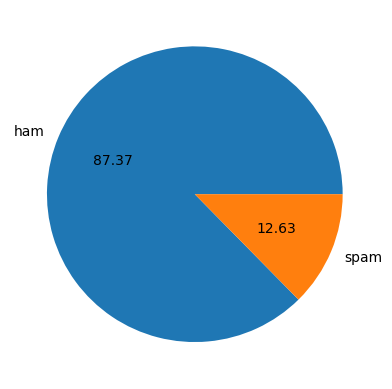

In [250]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] , autopct="%0.2f")
plt.show()

In [252]:
# Data is imbalanced

In [254]:
import nltk

In [256]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VANSHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [258]:
df['num_characters'] = df['text'].apply(len)

In [260]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [262]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [264]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [266]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [268]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [270]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [272]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [274]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [276]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

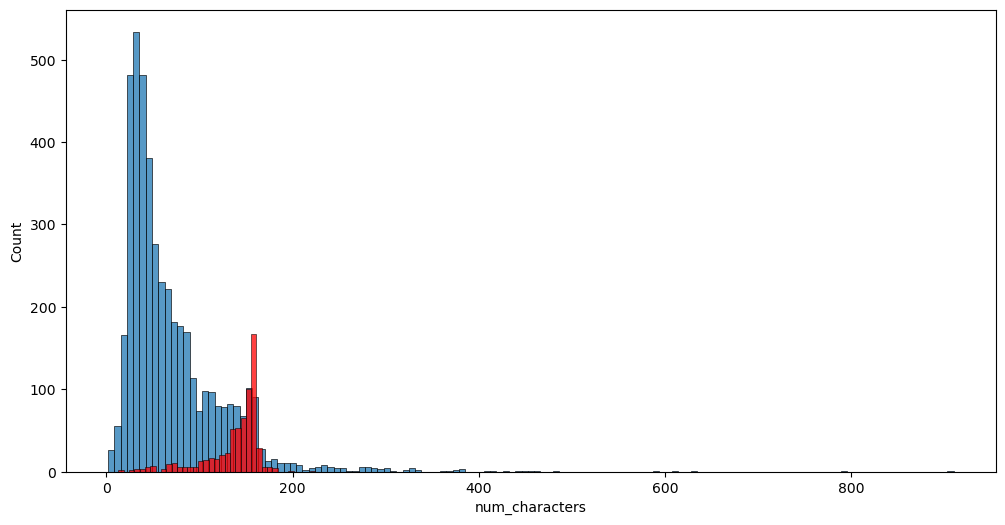

In [278]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color='red')

<Axes: xlabel='num_words', ylabel='Count'>

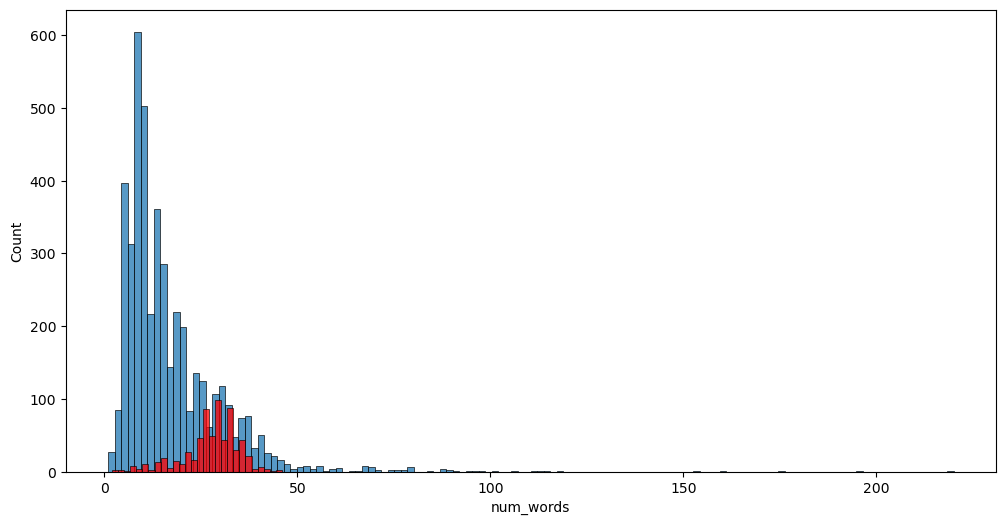

In [280]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color='red')

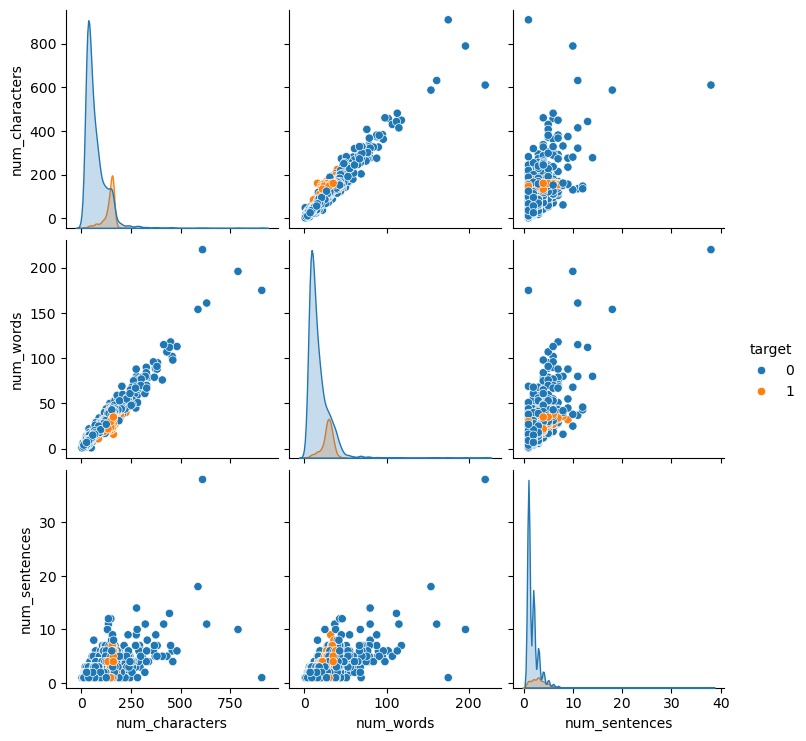

In [282]:
sns.pairplot(df, hue='target')

In [283]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

<Axes: >

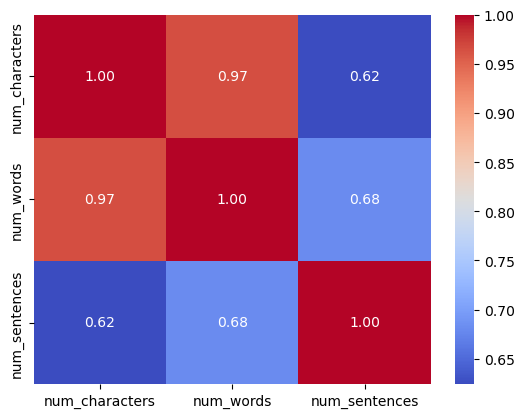

In [284]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

**3. DATA PREPROCESSING**


In [289]:
#LOWER CASE
#TOKENIZATION
#REMOVING SPECIAL CHARACTERS
#REMOVING STOP WORDS AND PUNCTUATIONS
#STEMMING

In [291]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Ensure you have the necessary NLTK resources downloaded
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Initialize the PorterStemmer
    ps = PorterStemmer()
    
    # Prepare an empty list for processed tokens
    processed_tokens = []
    
    # Filter out stopwords, punctuation, and stem the words
    for token in tokens:
        if token.isalnum() and token not in stopwords.words('english'):
            stemmed_token = ps.stem(token)
            processed_tokens.append(stemmed_token)
    
    # Join the processed tokens into a single string and return
    return " ".join(processed_tokens)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VANSHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VANSHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [293]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [295]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [297]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [301]:
df['transformed_text'] = df['text'].apply(transform_text)

In [302]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [303]:
spam_wc = wc.generate(df[df['target'] == 1 ]['transformed_text'].str.cat(sep = " "))

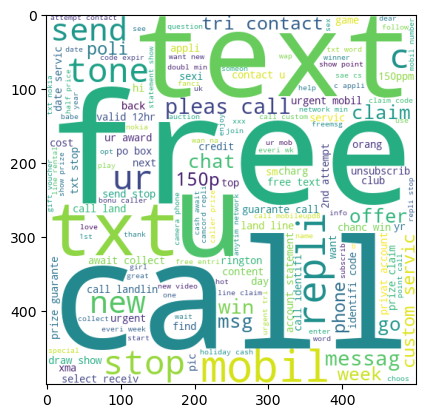

In [304]:
plt.imshow(spam_wc)

In [305]:
ham_wc = wc.generate(df[df['target'] == 0 ]['transformed_text'].str.cat(sep = " "))

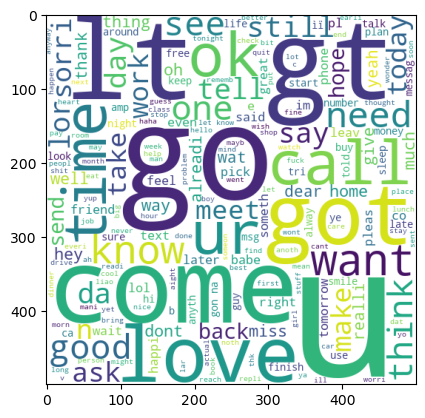

In [306]:
plt.imshow(ham_wc)

In [307]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [308]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [309]:
len(spam_corpus)

9939

C:\Users\VANSHIKA\AppData\Local\Temp\ipykernel_23028\1996388391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_words, palette='Set2', hue=None, legend=False)


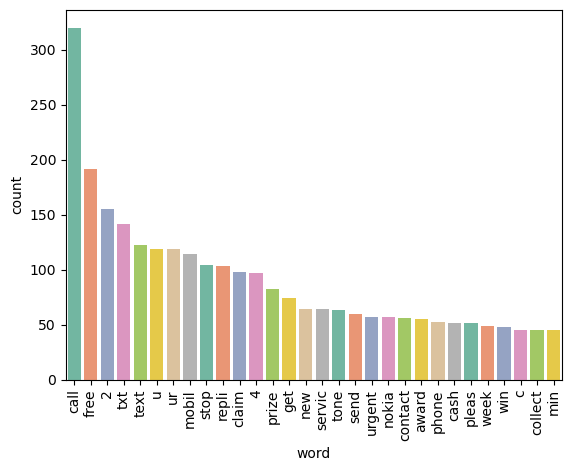

In [310]:
from collections import Counter
# Get the 30 most common words in 'spam_corpus'
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Create a barplot using Seaborn
sns.barplot(x='word', y='count', data=common_words, palette='Set2', hue=None, legend=False)

plt.xticks(rotation= 'vertical')
plt.show()

In [311]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [312]:
len(ham_corpus)

35404

C:\Users\VANSHIKA\AppData\Local\Temp\ipykernel_23028\3845296428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_words, palette='Set2', hue=None, legend=False)


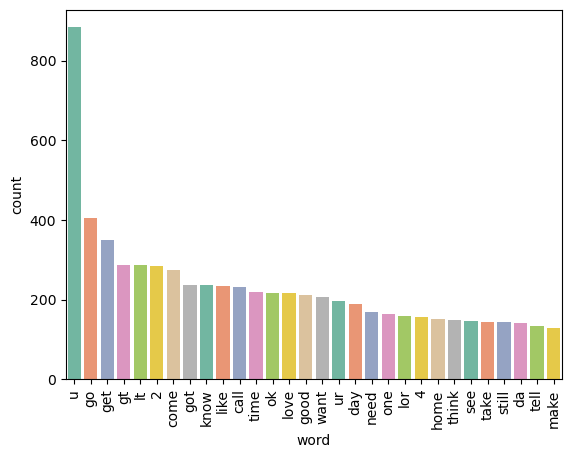

In [313]:
from collections import Counter
# Get the 30 most common words in 'spam_corpus'
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Create a barplot using Seaborn
sns.barplot(x='word', y='count', data=common_words, palette='Set2', hue=None, legend=False)

plt.xticks(rotation= 'vertical')
plt.show()

**4. Model Building**

In [315]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [316]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [317]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [318]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [319]:
X.shape

(5169, 3000)

In [320]:
y = df['target'].values

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [323]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [324]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [325]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [326]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [327]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [328]:
# tfidf --> MNB

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [330]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [331]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [332]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [333]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [334]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\VANSHIKA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [335]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [336]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [337]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [338]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


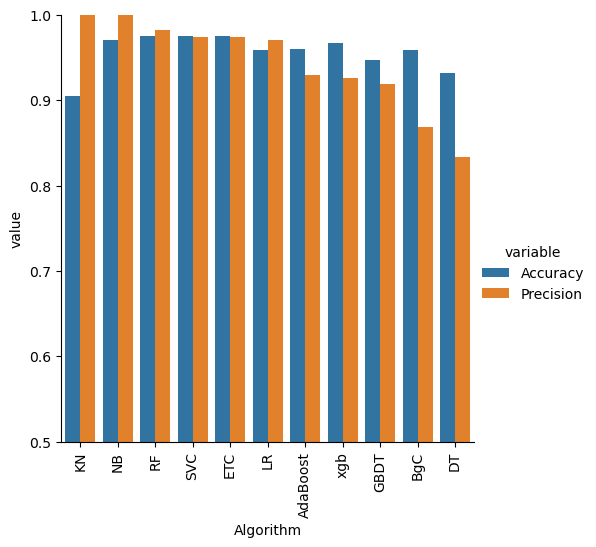

In [339]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [340]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [341]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [342]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [343]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [344]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [345]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [346]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [347]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [348]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [349]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [350]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [351]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score

# Sample data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, size=100)  # Binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
svc = SVC(probability=True)  # Set probability=True for stacking
mnb = MultinomialNB()
etc = ExtraTreesClassifier()

# Define the stacking classifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Fit the stacking classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate and print accuracy and precision
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.65
Precision: 0.5


In [353]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
 

In [354]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice(['ham', 'spam'], size=100)  # Categorical target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an instance of the MultinomialNB model
mnb = MultinomialNB()

# Fit the model with training data
mnb.fit(X_train, y_train_encoded)

# Make predictions on the training set
y_train_pred = mnb.predict(X_train)

# Print training labels and predictions
print("Training labels:", label_encoder.inverse_transform(y_train_encoded))
print("Training predictions:", label_encoder.inverse_transform(y_train_pred))

# Evaluate on training data
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Confusion matrix
cm = confusion_matrix(y_train_encoded, y_train_pred)
print("Confusion Matrix:\n", cm)

# Make predictions on the test set
y_pred = mnb.predict(X_test)
print("Test Predictions:", label_encoder.inverse_transform(y_pred))


Training labels: ['spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam'
 'spam' 'ham' 'ham' 'spam' 'ham' 'spam' 'spam' 'ham' 'ham' 'spam' 'ham'
 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'spam' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham'
 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'spam'
 'spam' 'ham' 'spam']
Training predictions: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 '

In [355]:
# Assuming mnb is already fitted and you have defined X_train
# Example input for prediction (make sure it has the same number of features as X_train)
vector_input = np.array([[0.5, 0.2, 0.1, 0.3, 0.4]])  # Example input with 5 features

# Check if the model is fitted and make predictions
if hasattr(mnb, 'classes_'):
    result = mnb.predict(vector_input)
    print("Predictions:", result)
else:
    print("Model is not fitted yet.")

Predictions: [0]
